In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
step1 = pd.read_excel('step1_seperate_depand_variable.xlsx')

In [18]:
step2 = pd.read_excel('step2_normalize+datacleaning.xlsx')

In [19]:
step3 = pd.read_excel('step3_interpolated.xlsx')

In [20]:
Bdedi_t2=[step2["Bdedi_t2"],step3["Bdedi_t2"]]
[step2["Bdedi_t2"].count(),step3["Bdedi_t2"].count()]

[313, 2985]

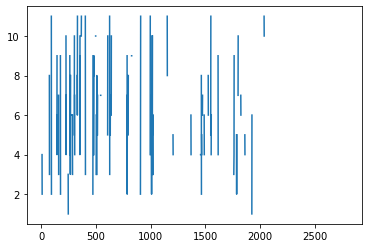

In [21]:
step2["Bdedi_t2"].plot()

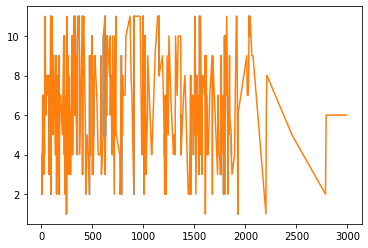

In [22]:
for impacts in Bdedi_t2:
     timefilteredForce = plt.plot(impacts)

In [23]:
df= pd.read_excel('important_column.xlsx')
df


,Bdedi_t2,restriction_aliment_t2,restriction_substance_t2,Buedi_t2,BCCies_t2,EPRies_t2,HSCies_t2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2986,6.0,2.0,2.0,6.0,3.67,4.5,3.0
2987,6.0,2.0,2.0,6.0,3.67,4.5,3.0
2988,6.0,2.0,2.0,6.0,3.67,4.5,3.0
2989,6.0,2.0,2.0,6.0,3.67,4.5,3.0


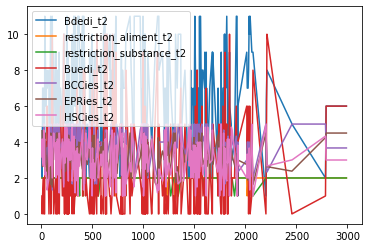

In [24]:
df.plot()

Missing values with mean and clustering




In [25]:
df_mean= df.replace(np.nan, df.mean())
df_mean


,Bdedi_t2,restriction_aliment_t2,restriction_substance_t2,Buedi_t2,BCCies_t2,EPRies_t2,HSCies_t2
0,6.267839,1.968007,1.935176,2.861809,3.831223,3.187168,3.042734
1,6.267839,1.968007,1.935176,2.861809,3.831223,3.187168,3.042734
2,6.267839,1.968007,1.935176,2.861809,3.831223,3.187168,3.042734
3,6.267839,1.968007,1.935176,2.861809,3.831223,3.187168,3.042734
4,6.267839,1.968007,1.935176,2.861809,3.831223,3.187168,3.042734
...,...,...,...,...,...,...,...
2986,6.000000,2.000000,2.000000,6.000000,3.670000,4.500000,3.000000
2987,6.000000,2.000000,2.000000,6.000000,3.670000,4.500000,3.000000
2988,6.000000,2.000000,2.000000,6.000000,3.670000,4.500000,3.000000
2989,6.000000,2.000000,2.000000,6.000000,3.670000,4.500000,3.000000


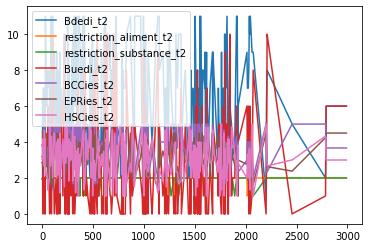

In [53]:
df_mean.plot()

In [54]:
df_mean.corr()


,Bdedi_t2,restriction_aliment_t2,restriction_substance_t2,Buedi_t2,BCCies_t2,EPRies_t2,HSCies_t2
Bdedi_t2,1.000000,-0.126830,-0.079555,0.451136,-0.533254,-0.443254,-0.609863
restriction_aliment_t2,-0.126830,1.000000,0.332361,0.059385,-0.031264,0.053840,0.136622
restriction_substance_t2,-0.079555,0.332361,1.000000,-0.097427,0.102824,0.193530,0.218819
Buedi_t2,0.451136,0.059385,-0.097427,1.000000,-0.629333,-0.294920,-0.512632
BCCies_t2,-0.533254,-0.031264,0.102824,-0.629333,1.000000,0.349293,0.531952
EPRies_t2,-0.443254,0.053840,0.193530,-0.294920,0.349293,1.000000,0.504222
HSCies_t2,-0.609863,0.136622,0.218819,-0.512632,0.531952,0.504222,1.000000


In [55]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_mean)

array([0, 0, 0, ..., 2, 2, 2])

In [56]:
c=cluster.labels_
nc0_mean=[]
nc1_mean=[]
nc2_mean=[]
for i in range(len(c)):
  if c[i]==0:
    nc0_mean.append(i)
  if c[i]==1:
    nc1_mean.append(i)
  if c[i]==2:
    nc2_mean.append(i)

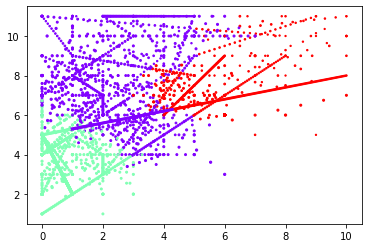

In [57]:
plt.scatter(df_mean['Buedi_t2'],df_mean['Bdedi_t2'],df_mean['BCCies_t2'], c=cluster.labels_, cmap='rainbow')


In [58]:
nc_mean= [len(nc0_mean),len(nc1_mean),len(nc2_mean)]
print(len(nc0_mean)+len(nc1_mean)+len(nc2_mean))
print(nc_mean)

2991
[1255, 963, 773]


In [59]:
dft_mean=df_mean.transpose()


In [60]:
from pandas import DataFrame
dfcl0_mean=[]
dfcl1_mean=[]
dfcl2_mean=[]
for i in range(len(nc0_mean)):
  j=nc0_mean[i]
  dfcl0_mean.append(dft_mean[j])
dfq0_mean = DataFrame(dfcl0_mean)
for i in range(len(nc1_mean)):
  w=nc1_mean[i]
  dfcl1_mean.append(dft_mean[w])
dfq1_mean = DataFrame(dfcl1_mean)
for i in range(len(nc2_mean)):
  t=nc2_mean[i]
  dfcl2_mean.append(dft_mean[t])
dfq2_mean = DataFrame(dfcl2_mean)

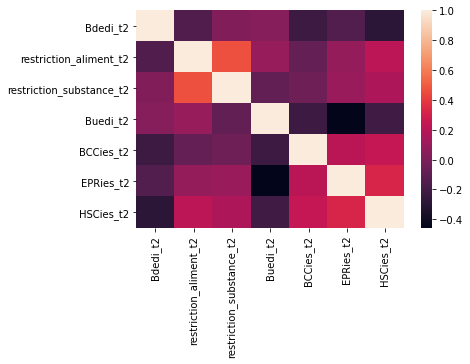

In [63]:
sns.heatmap(dfq0_mean.corr());

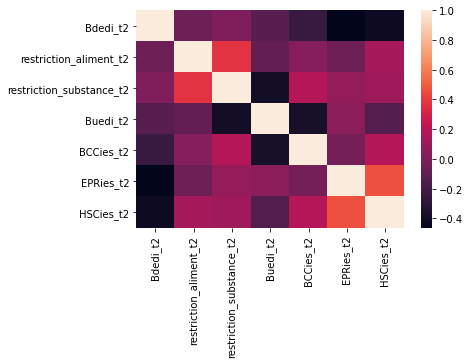

In [64]:
sns.heatmap(dfq1_mean.corr());

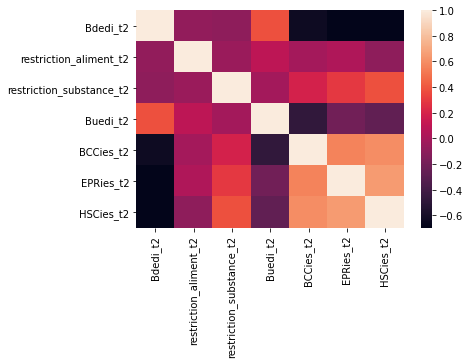

In [65]:
sns.heatmap(dfq2_mean.corr());

Missing values with median and clustering


In [69]:
df_median= df.replace(np.nan, df.median())
df_median

,Bdedi_t2,restriction_aliment_t2,restriction_substance_t2,Buedi_t2,BCCies_t2,EPRies_t2,HSCies_t2
0,6.0,2.0,2.0,2.25,3.855625,3.101854,3.0
1,6.0,2.0,2.0,2.25,3.855625,3.101854,3.0
2,6.0,2.0,2.0,2.25,3.855625,3.101854,3.0
3,6.0,2.0,2.0,2.25,3.855625,3.101854,3.0
4,6.0,2.0,2.0,2.25,3.855625,3.101854,3.0
...,...,...,...,...,...,...,...
2986,6.0,2.0,2.0,6.00,3.670000,4.500000,3.0
2987,6.0,2.0,2.0,6.00,3.670000,4.500000,3.0
2988,6.0,2.0,2.0,6.00,3.670000,4.500000,3.0
2989,6.0,2.0,2.0,6.00,3.670000,4.500000,3.0


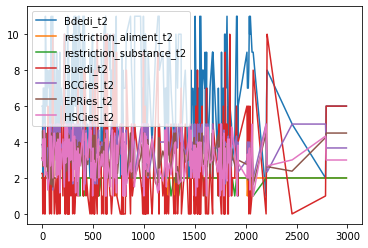

In [70]:
df_median.plot()

In [71]:
df_median.corr()


,Bdedi_t2,restriction_aliment_t2,restriction_substance_t2,Buedi_t2,BCCies_t2,EPRies_t2,HSCies_t2
Bdedi_t2,1.000000,-0.126873,-0.079621,0.451159,-0.533254,-0.443215,-0.609841
restriction_aliment_t2,-0.126873,1.000000,0.332453,0.059265,-0.031249,0.053784,0.136591
restriction_substance_t2,-0.079621,0.332453,1.000000,-0.097576,0.102833,0.193430,0.218761
Buedi_t2,0.451159,0.059265,-0.097576,1.000000,-0.629306,-0.294835,-0.512570
BCCies_t2,-0.533254,-0.031249,0.102833,-0.629306,1.000000,0.349280,0.531947
EPRies_t2,-0.443215,0.053784,0.193430,-0.294835,0.349280,1.000000,0.504226
HSCies_t2,-0.609841,0.136591,0.218761,-0.512570,0.531947,0.504226,1.000000


In [75]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_median)

array([0, 0, 0, ..., 1, 1, 1])

In [76]:
c=cluster.labels_
nc0_median=[]
nc1_median=[]
nc2_median=[]
for i in range(len(c)):
  if c[i]==0:
    nc0_median.append(i)
  if c[i]==1:
    nc1_median.append(i)
  if c[i]==2:
    nc2_median.append(i)

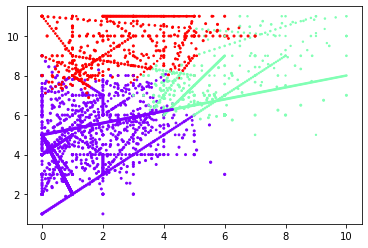

In [78]:
plt.scatter(df_median['Buedi_t2'],df_median['Bdedi_t2'],df_median['BCCies_t2'], c=cluster.labels_, cmap='rainbow')


In [79]:
nc_median= [len(nc0_median),len(nc1_median),len(nc2_median)]
print(len(nc0_median)+len(nc1_median)+len(nc2_median))
print(nc_median)

2991
[1674, 780, 537]


In [80]:
dft_median=df_median.transpose()


In [81]:
from pandas import DataFrame
dfcl0_median=[]
dfcl1_median=[]
dfcl2_median=[]
for i in range(len(nc0_median)):
  j=nc0_median[i]
  dfcl0_median.append(dft_median[j])
dfq0_median = DataFrame(dfcl0_median)
for i in range(len(nc1_median)):
  w=nc1_median[i]
  dfcl1_median.append(dft_median[w])
dfq1_median = DataFrame(dfcl1_median)
for i in range(len(nc2_median)):
  t=nc2_median[i]
  dfcl2_median.append(dft_median[t])
dfq2_median = DataFrame(dfcl2_median)

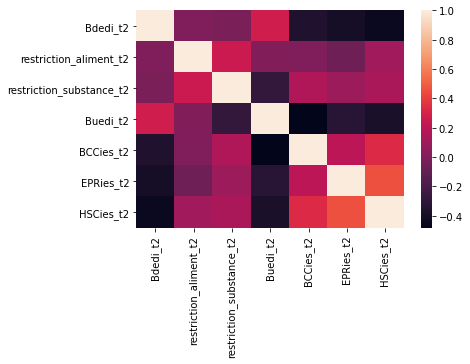

In [82]:
sns.heatmap(dfq0_median.corr());

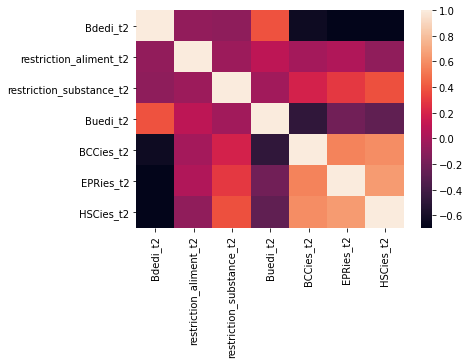

In [83]:
sns.heatmap(dfq1_median.corr());

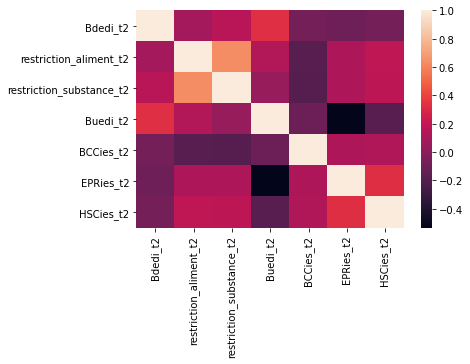

In [84]:
sns.heatmap(dfq2_median.corr());